# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import plotly.figure_factory as ff

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [155]:
x_test = pd.read_csv("x_test.csv", delimiter=",")  
y_test = pd.read_csv("y_test.csv", delimiter=",") 
x_train = pd.read_csv("x_train_balanced.csv", delimiter=",")
y_train = pd.read_csv("y_train_balanced.csv", delimiter=",")

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [156]:
# Antes de tudo quero garantir que o dados tem os mesmos números de linhas
x_test.shape

(40, 7)

In [174]:
y_test.shape

(40, 1)

In [158]:
x_train.shape

(243, 7)

In [159]:
y_train.shape

(243, 1)

In [160]:
# Vamos também verificar o balanceamento 
train_balanced = y_train.value_counts()
print("Balanceamento em y_train")
print(train_balanced)

test_balanced = y_test.value_counts()
print("Balanceamento do y_test")
print(test_balanced)

Balanceamento em y_train
Credit Score_encoder
0                       81
1                       81
2                       81
Name: count, dtype: int64
Balanceamento do y_test
Credit Score_encoder
1                       27
0                        9
2                        4
Name: count, dtype: int64


In [161]:
naive_score = GaussianNB()
naive_score.fit(x_train, y_train)

C:\Users\Facundo Atahides\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [162]:
y_pred_train = naive_score.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train) 
print("Acurácia:", accuracy)

Acurácia: 0.9382716049382716


In [163]:
# Acurácia de 0.93 significa que o modelo está fazendo previsões corretas em cerca de 93% dos exemplos.

In [164]:
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

Recall: 0.9382716049382717


In [ ]:
# Recall de 93% também

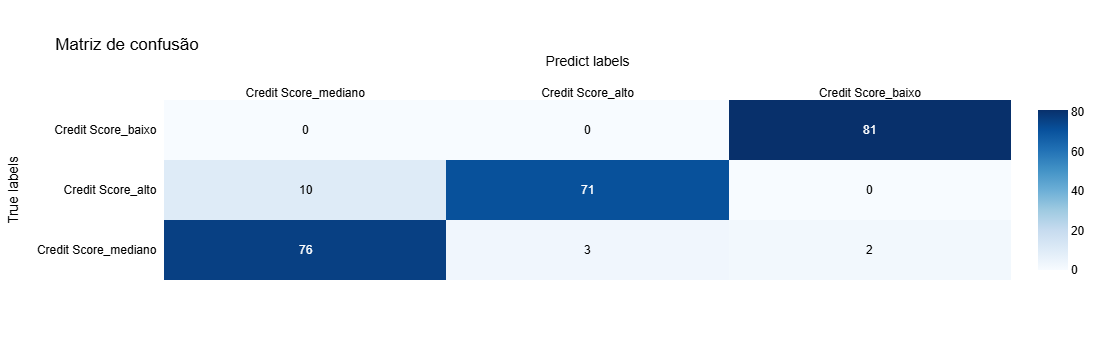

In [173]:
confusao_matrix = confusion_matrix(y_train, y_pred_train)
class_names = ["Credit Score_mediano", "Credit Score_alto", "Credit Score_baixo"]

fig = ff.create_annotated_heatmap(
    z=confusao_matrix,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True
)
fig.update_layout(
    title="Matriz de confusão",
    xaxis_title="Predict labels",
    yaxis_title="True labels",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)    

In [139]:
# Como eu usei o average='macro', o recall vai ser calculado para cada classe individualmente, e depois a média simples dos recalls será feita.
# diferentemente da outra atividade de churn e não churn, se fosse nesse caso, o recall iria mais para os exemplos positivos(Churn).

# Resumo de tudo, sobre o desempenho do modelo, o recall e acurácia deram os mesmos resultados, isso é um bom sinal.
# Porém... sabemos que a base train está bem balanceada, vamos ter que ver a base de teste mais a frente para não se enganar com estes resultados de agora. 

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [168]:
y_pred_test = naive_score.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='macro') 

print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.925
Recall: 0.9382716049382717


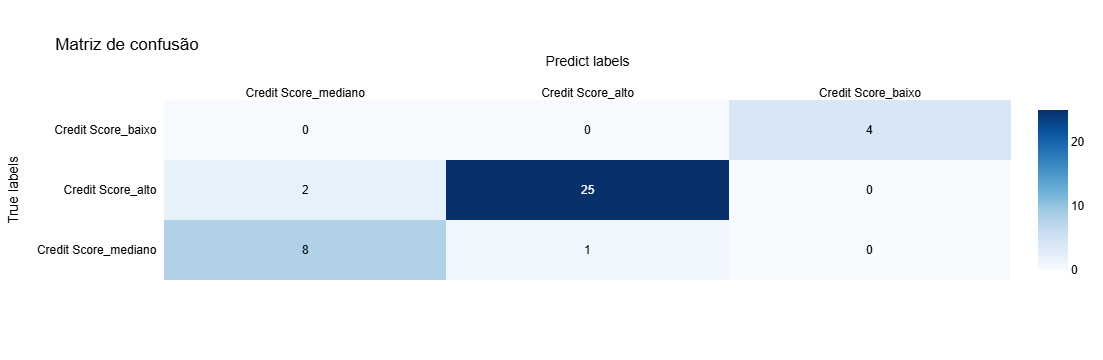

In [175]:
confusao_matrix = confusion_matrix(y_test, y_pred_test)
class_names = ["Credit Score_mediano", "Credit Score_alto", "Credit Score_baixo"]

fig = ff.create_annotated_heatmap(
    z=confusao_matrix,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True
)
fig.update_layout(
    title="Matriz de confusão",
    xaxis_title="Predict labels",
    yaxis_title="True labels",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)    

In [ ]:
# Vemos que na base já de treino, temos bons resultados.
# Recall de 93% e Acurácia de 92,5% 
# pelo fato de balancear os dados de treino, ele foi eficas em acertar tudo sobre o score_baixo, ele treinou com muitos dados, e foi prefeito em prever essa area

# Acredito que o desempenho tenha cido praticamente igual pelo fato de balancear todos os dados, já que a aprendizagem foi bem no treino, pelo fato de se ter poucos dados no teste, acabou ficando facil para a aprendizagem.
# Pois ela treinou com muito mais dados, e depois teve que preveer poucos. 

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

In [ ]:
# O projeto desenvolvido nesta atividade teve como objetivo aplicar o algoritmo de Naive Bayes em uma base de dados de crédito para prever a classificação de clientes. levando em consideração diferentes características, como o score de crédito.
# O principal foco foi entender como o modelo se comporta diante de dados balanceados e a importância de medir as métricas de desempenho, como acurácia e recall, para avaliar a eficácia da classificação. 
# Utilizamos a técnica de balanceamento de dados para melhorar o desempenho do modelo, principalmente em relação à classe minoritária, garantindo uma previsão mais precisa para todos os casos. 
# O objetivo principal ao aplicar o Naive Bayes foi otimizar a previsão das classes de crédito, identificando clientes com maior risco de inadimplência.